# 상관분석과 회귀분석

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

> 1. 상관계수 유의성 검정

In [2]:
filename = 'data/data_3_1.csv'
df = pd.read_csv(filename)

<AxesSubplot: xlabel='weight', ylabel='height'>

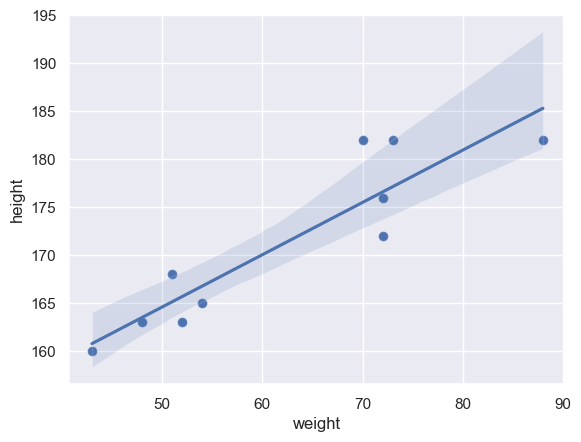

In [3]:
sns.set_theme(color_codes=True)
sns.scatterplot(df, x = 'weight', y = 'height')
sns.regplot(df, x = 'weight', y = 'height')

In [4]:
# Pearson 상관계수 : Pandas
print(df['weight'].corr(df['height'], method = 'pearson'))
print(df.weight.corr(df.height, method = 'pearson'))

0.9096220430530333
0.9096220430530333


In [5]:
# Pearson 상관계수 : Scipy
corr, p = stats.pearsonr(df.weight, df.height)

# 유의성 검정
print('H0 : rho = 0')
print('H1 : rho != 0')
print('r = %.4f, p = %.4f' %(corr,p))

if p>0.05:
     print('H0을 채택 및 H1을 기각')
else:
    print('H0을 기각 및 H1을 채택')

H0 : rho = 0
H1 : rho != 0
r = 0.9096, p = 0.0003
H0을 기각 및 H1을 채택


<AxesSubplot: xlabel='weight', ylabel='height'>

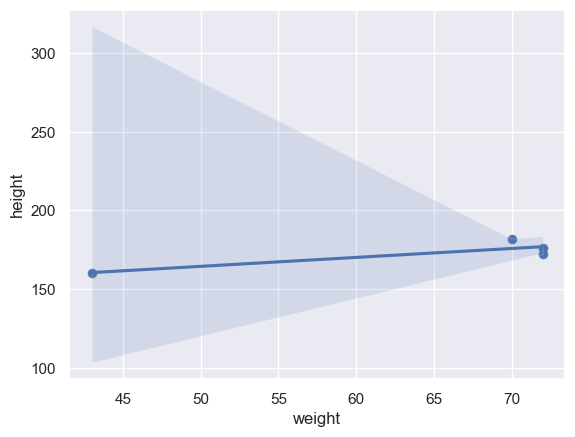

In [6]:
df = df[df.id<5]

sns.set_theme(color_codes=True)
sns.scatterplot(df, x = 'weight', y = 'height')
sns.regplot(df, x = 'weight', y = 'height')

In [7]:
# Pearson 상관계수 : Pandas
print(df['weight'].corr(df['height'], method = 'pearson'))
print(df.weight.corr(df.height, method = 'pearson'))

0.8679384352813657
0.8679384352813657


> 2. 서열상관계수 유의성 검정

In [8]:
filename = 'data/data_3_2.csv'
df = pd.read_csv(filename)

# Spearman 상관계수 : Scipy
import scipy.stats as stats
corr,p = stats.spearmanr(df.prefer_ord, df.morality_ord)

# 상관계수의 유의성 검정
print('H0 : rho = 0')
print('H1 : rho != 0')
print('r = %.4f, p = %.4f' %(corr,p))
if p>0.05:
     print('H0을 채택 및 H1을 기각')
else:
    print('H0을 기각 및 H1을 채택')

H0 : rho = 0
H1 : rho != 0
r = 0.7818, p = 0.0075
H0을 기각 및 H1을 채택


> 3. 교차분석

In [9]:
df = pd.read_csv('./data/data_3_3.csv', index_col='telecom')
df

,north,west,east,south
telecom,,,,
S,21,23,33,42
K,38,26,26,13
L,23,19,16,8


In [10]:
# Chi2 검정 : Scipy
stat, p, dof, expected = stats.chi2_contingency(observed=df)

print('H0 : 행과 열이 서로 독립적이다(관련이 없다)')
print('H1 : 행과 열이 서로 독립적이 아니다(관련이 있다)\n')
print('chi2 = %.4f\np=%.4f' % (stat,p))

if p > 0.05:
    print('귀무가설 채택 및 대립가설 기각 >> 관련이 없다')
else:
    print('귀무가설 기각 및 대립가설 채택 >> 관련이 있다')

H0 : 행과 열이 서로 독립적이다(관련이 없다)
H1 : 행과 열이 서로 독립적이 아니다(관련이 있다)

chi2 = 27.1315
p=0.0001
귀무가설 기각 및 대립가설 채택 >> 관련이 있다


> 4. 최소제곱법을 이용한 회귀선 도출 예제

In [11]:
df = pd.read_csv('./data/data_3_4.csv')
df

,weight,height
0,72,176
1,72,172
2,70,182
3,43,160
4,48,163
5,54,165
6,51,168
7,52,163
8,73,182
9,45,148


In [12]:
n = 20
x = df['weight']
y = df['height']
x_bar = x.mean()
y_bar = y.mean()

sum_bar = 0
for i in range(n):
    sum_bar = sum_bar + ((x[i] - x_bar)*(y[i] - y_bar))

sum_x_bar = 0
for i in range(n):
    sum_x_bar = sum_x_bar + (x[i]-x_bar)**2
    

B1 = sum_bar / sum_x_bar

B0 = y_bar - (B1*x_bar)
B0

# 최종 회귀선 : 
print(f'최종 회귀선 :yi(hat) = {B0} + {B1}xi')

최종 회귀선 :yi(hat) = 130.67454896428836 + 0.6210557576657508xi


In [13]:
import numpy as np

fit_line = np.polyfit(x, y, 1) # x축 데이터, y축 데이터, 1차원

print(fit_line)

[  0.62105576 130.67454896]


In [14]:
# R^2 결정계수
from sklearn.metrics import r2_score

est_y = np.array(x) * fit_line[0] + fit_line[1] # x의 실제 값들을 회귀식에 대입한 y 추정치

r2 = r2_score(y, est_y)
r2

0.7296532883250009

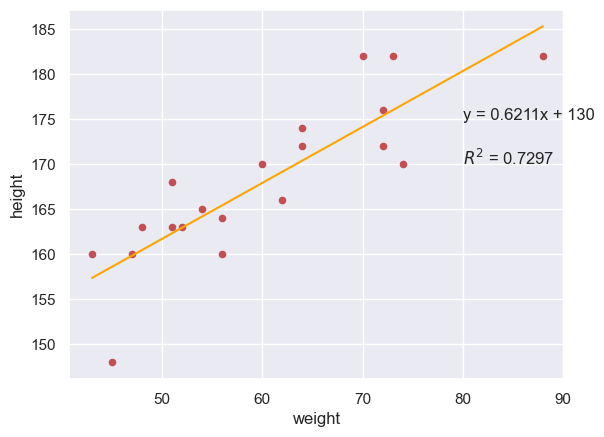

In [15]:
x_minmax = np.array([min(x), max(x)]) # x축 최소값, 최대값

fit_y = x_minmax * fit_line[0] + fit_line[1] # x축 최소, 최대값을 회귀식에 대입한 값

plt.scatter(x, y, color = 'r', s = 20)
plt.plot(x_minmax, fit_y, color = 'orange') # 회귀선 그래프 그리기
plt.text(80,170,'$R^2$ = %.4f'%r2, size = 12) # (80, 170)의 위치에 크기 12로 R값 새김
plt.text(80,175, 'y = %.4fx + %d'%(fit_line[0], fit_line[1]), size = 12) # (80, 175) 위치에 추세선 식 표현
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [16]:
# 위를 statsmodels 패키지 사용 

# 회귀 모형 설계 : 단순 선형회귀 모형
formula = 'height ~ weight'

# statmodels 로 회귀분석 실시
model = sm.OLS.from_formula(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     48.58
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.65e-06
Time:                        16:52:29   Log-Likelihood:                -57.953
No. Observations:                  20   AIC:                             119.9
Df Residuals:                      18   BIC:                             121.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    130.6745      5.454     23.959      0.0

> 5. 회귀분석

In [17]:
# Minitab
df = pd.read_csv('./data/data_3_5.csv')
df

,score1,score2
0,4.1,2.1
1,2.2,1.5
2,2.7,1.7
3,6.0,2.5
4,8.5,3.0
5,4.1,2.1
6,9.0,3.2
7,8.0,2.8
8,7.5,2.5


In [18]:
formula = 'score2~score1'

# statsmodel
model = sm.OLS.from_formula(formula, data = df).fit()
print(model.summary())

# outlier
print('Outliers :')
outtest = model.outlier_test()
print(outtest[outtest['bonf(p)'] < 1])

                            OLS Regression Results                            
Dep. Variable:                 score2   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     156.6
Date:                Fri, 19 May 2023   Prob (F-statistic):           4.80e-06
Time:                        16:52:29   Log-Likelihood:                 6.9030
No. Observations:                   9   AIC:                            -9.806
Df Residuals:                       7   BIC:                            -9.411
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1177      0.109     10.227      0.0

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
outtest

,student_resid,unadj_p,bonf(p)
0,0.746510,0.483573,1.000000
1,-0.932194,0.387210,1.000000
2,-0.046694,0.964273,1.000000
3,0.605781,0.566855,1.000000
4,0.270563,0.795794,1.000000
5,0.746510,0.483573,1.000000
6,1.193581,0.277690,1.000000
7,-0.490069,0.641488,1.000000
8,-3.415824,0.014216,0.127948


> 5-1. 다중회귀분석

In [20]:
df = pd.read_csv('./data/data_3_6.csv')
df

,HeatFlux,Insolation,East,South,North,Time
0,271.8,783.35,33.53,40.55,16.66,13.20
1,264.0,748.45,36.50,36.19,16.46,14.11
2,238.8,684.45,34.66,37.31,17.66,15.68
3,230.7,827.80,33.13,32.52,17.50,10.53
4,251.6,860.45,35.75,33.71,16.40,11.00
5,257.9,875.15,34.46,34.14,16.28,11.31
6,263.9,909.45,34.60,34.85,16.06,11.96
7,266.5,905.55,35.38,35.89,15.93,12.58
8,229.1,756.00,35.85,33.53,16.60,10.66
9,239.3,769.35,35.68,33.79,16.41,10.85


In [21]:
# 회귀모형 설계 : 다중선형회귀 모형
formula = 'HeatFlux ~ East + South + North'

# statsmodel
model = sm.OLS.from_formula(formula, data = df).fit()
print(model.summary())

# outlier
print('Outliers :')
outtest = model.outlier_test()
print(outtest[outtest['bonf(p)'] < 1])

                            OLS Regression Results                            
Dep. Variable:               HeatFlux   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     57.87
Date:                Fri, 19 May 2023   Prob (F-statistic):           2.17e-11
Time:                        16:52:29   Log-Likelihood:                -101.39
No. Observations:                  29   AIC:                             210.8
Df Residuals:                      25   BIC:                             216.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    389.1659     66.094      5.888      0.0

In [22]:
# East의 P값이 크기에
# 제거한 후 다시 모델 설계

formula = 'HeatFlux ~  South + North'

# statsmodel
model = sm.OLS.from_formula(formula, data = df).fit()
print(model.summary())

# outlier
print('Outliers :')
outtest = model.outlier_test()
print(outtest[outtest['bonf(p)'] < 1])

                            OLS Regression Results                            
Dep. Variable:               HeatFlux   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     79.01
Date:                Fri, 19 May 2023   Prob (F-statistic):           8.94e-12
Time:                        16:52:29   Log-Likelihood:                -103.07
No. Observations:                  29   AIC:                             212.1
Df Residuals:                      26   BIC:                             216.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    483.6703     39.567     12.224      0.0

In [23]:
# East와 North 만을 해보기
formula = 'HeatFlux ~  East + North'

# statsmodel
model = sm.OLS.from_formula(formula, data = df).fit()
print(model.summary())

# outlier
print('Outliers :')
outtest = model.outlier_test()
print(outtest[outtest['bonf(p)'] < 1])

                            OLS Regression Results                            
Dep. Variable:               HeatFlux   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     33.52
Date:                Fri, 19 May 2023   Prob (F-statistic):           6.34e-08
Time:                        16:52:29   Log-Likelihood:                -112.96
No. Observations:                  29   AIC:                             231.9
Df Residuals:                      26   BIC:                             236.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    605.3621     77.813      7.780      0.0

In [24]:
## 위의 모델에서 수정된 결정계수의 값을 비교해보기

---

> Seaborn Tips 데이터셋 더미변수 회귀분석

In [25]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
# 수치형 변수만으로 회귀분석하기
# 설계 : 다중선형회귀 모형
formula = 'tip ~ total_bill*size'

# statmodels
model = sm.OLS.from_formula(formula, data=tips).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     70.51
Date:                Fri, 19 May 2023   Prob (F-statistic):           9.82e-33
Time:                        16:52:30   Log-Likelihood:                -347.84
No. Observations:                 244   AIC:                             703.7
Df Residuals:                     240   BIC:                             717.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9183      0.510     

In [27]:
# R^2가 낮고 size와 total_bill , size가 유의하지 않음
formula = 'tip ~ total_bill + size'

# statmodels
model = sm.OLS.from_formula(formula, data=tips).fit()
print(model.summary())

# R^2는 당연히 좋아질 수 없음
# 하지만 유의확률 값이 낮아짐으로써 유의하다고 볼 수 있음

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 19 May 2023   Prob (F-statistic):           9.67e-34
Time:                        16:52:30   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

In [28]:
formula = 'tip ~total_bill + size + C(day) + 0'
# 0은 풀랭크(full rank, one-hot)방식을 사용

# statmodels
model = sm.OLS.from_formula(formula, data=tips).fit()
print(model.summary())

# 풀랭크가 되면 interation인 상수항이 없음

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     42.07
Date:                Fri, 19 May 2023   Prob (F-statistic):           6.05e-31
Time:                        16:52:30   Log-Likelihood:                -347.69
No. Observations:                 244   AIC:                             707.4
Df Residuals:                     238   BIC:                             728.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(day)[Thur]     0.6683      0.219      3.051   

In [29]:
# 범주형 변수가 하나가 아닌 여러개인 경우
# + 0을 붙이지 않은 축소랭크(reduced_rank) 방식을 활용

formula = 'tip ~ total_bill + size + +C(sex) + C(smoker) + C(day) + C(time)'

# statmodels
model = sm.OLS.from_formula(formula, data=tips).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.20e-28
Time:                        16:52:30   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5908      0.25

---

> Seaborn Anscombe 데이터셋

In [30]:
df = sns.load_dataset('anscombe')
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [31]:
df1 = df[df.dataset == 'I']
df2 = df[df.dataset == 'II']
df3 = df[df.dataset == 'III']
df4 = df[df.dataset == 'IV']

In [32]:
# 회귀모형 설계 : 단순선형회귀 모형
formula = 'y~x'

# statsmodel
model1 = sm.OLS.from_formula(formula, data = df1).fit()
print(model1.summary())

model2 = sm.OLS.from_formula(formula, data = df2).fit()
print(model2.summary())

model3 = sm.OLS.from_formula(formula, data = df3).fit()
print(model3.summary())

model4 = sm.OLS.from_formula(formula, data = df4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Fri, 19 May 2023   Prob (F-statistic):            0.00217
Time:                        16:52:30   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.0

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


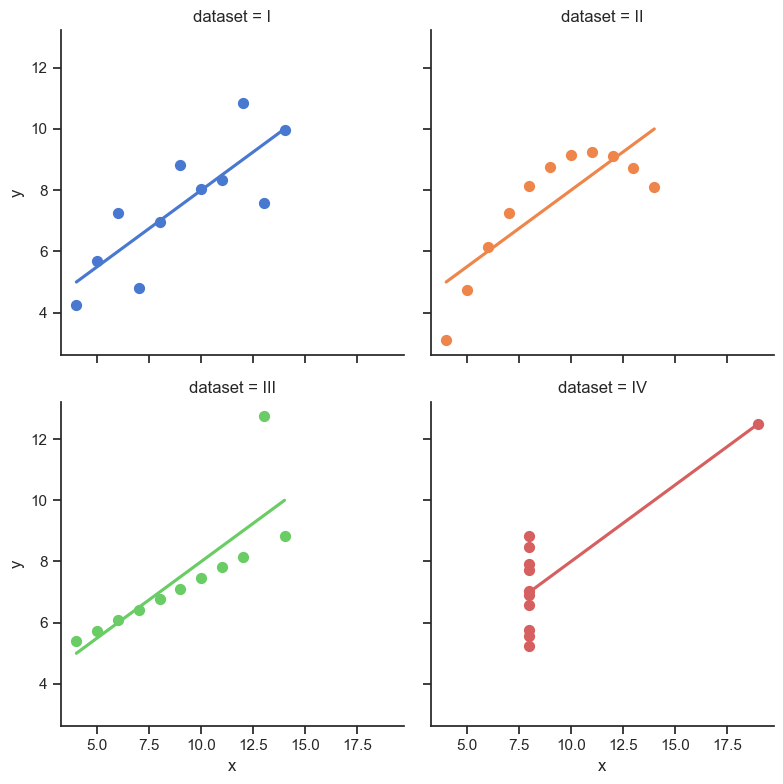

In [33]:
sns.set_theme(style='ticks')

sns.lmplot(
    data = df, x= 'x', y = 'y', col = 'dataset', hue = 'dataset',
    col_wrap=2, palette='muted', ci = None, height = 4, scatter_kws = {'s':50, 'alpha' : 1}
)

__앤스컴 콰르텟__